Installing the required Packages

In [1]:
!pip install geopandas
!pip install matplotlib
!pip install rasterio

Go download Hydrosheds Rivers data from their website

In [ ]:
# sorry guys bandicam is limited but we will just continue- You ca just write the code with me

In [3]:
# Now we are going to read and subset the data
import geopandas as gpd

# Load Africa shapefile
rivers_gdf = gpd.read_file(r'E:\Resources\Hydrorivers\HydroRIVERS_v10_af_shp\HydroRIVERS_v10_af.shp')

# Load Kenya shp
kenya_gdf = gpd.read_file(r'E:\Resources\All Kenya Data\Kenya_counties_2011\Kenya_county_dd.shp')

# Extracting Rivers Within Kenya
rivers_gdf = gpd.overlay(rivers_gdf, kenya_gdf, how='intersection')

In [10]:
# Just pause and write it out

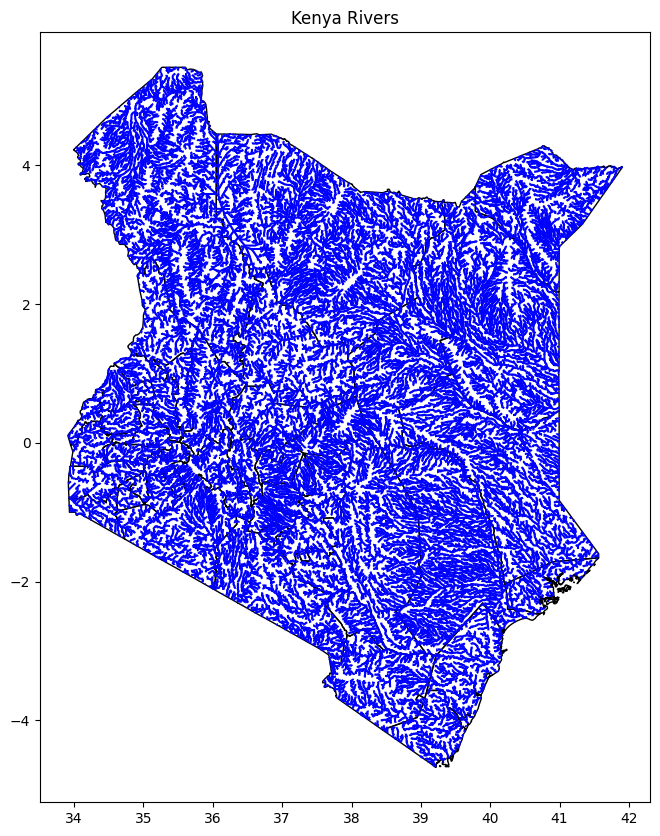

In [6]:
# Now displaying
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(figsize=(10,10))
rivers_gdf.plot(ax=ax, color='blue')
kenya_gdf.plot(ax=ax, edgecolor='black', facecolor='none')

#add a title
ax.set_title('Kenya Rivers')

#save the plot
plt.savefig('Kenya_rivers.png', dpi=300, bbox_inches='tight')

In [ ]:
# The first result

C:\Users\USER\AppData\Local\Temp\ipykernel_8152\943267855.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


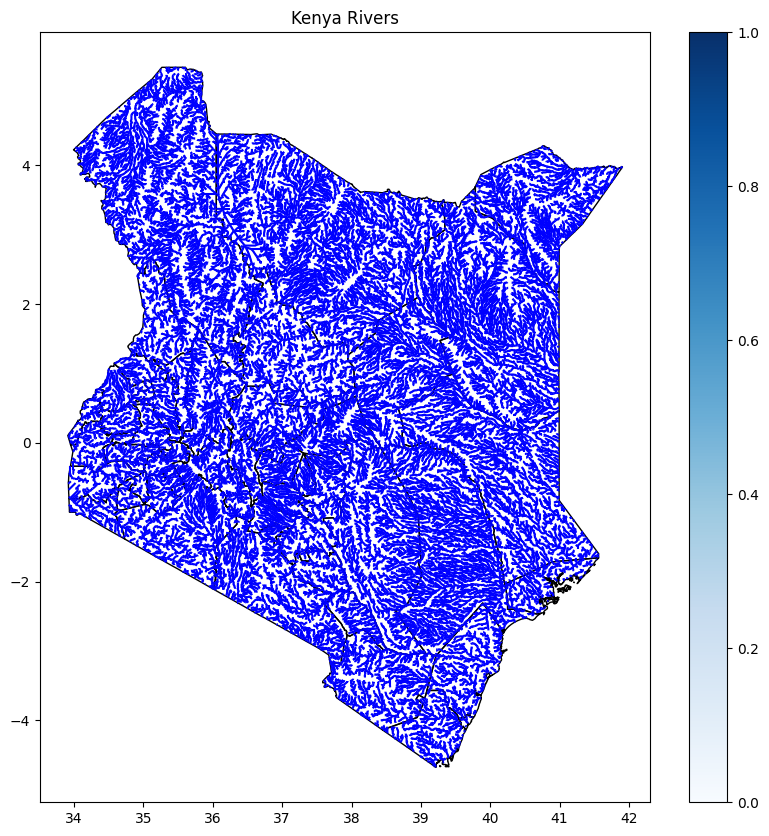

In [8]:
# Let us make it more beautiful and a color ramp too!

cmap = 'Blues'

# Plotting
fig, ax = plt.subplots(figsize=(10,10))
rivers_gdf.plot(ax=ax, color='blue')
kenya_gdf.plot(ax=ax, edgecolor='black', facecolor='none')

#add a title
ax.set_title('Kenya Rivers')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
cbar = fig.colorbar(sm)

#save the plot
plt.savefig('Kenya_rivers.png', dpi=300, bbox_inches='tight')


In [ ]:
# Now after adding colorbar

In [ ]:
#There we have it! and we can compare with the previous!!

In [9]:
# Let us also add one plotted from geemap - Google earth engine
# !pip install geemap 

In [22]:
import geemap as geemap
import ee

# Initiliaze with ee
ee.Initialize()

#Lets use Kenya boundaries polygon
# Define the Kenya country boundary
kenya_geometry = ee.Geometry.Polygon([
    [
        [33.907222, 4.630833],
        [41.899167, 4.630833],
        [41.899167, -4.677222],
        [33.907222, -4.677222],
        [33.907222, 4.630833]
    ]
])

#get the bounds
left, bottom, right, top = kenya_gdf.total_bounds

# center
center = [(top + bottom) / 2, (left + right) /2]


map1 = geemap.Map(center=center, zoom=6)

#create map with center in Kenya
map1.add_gdf(kenya_gdf, layer_name='kenya')

#Add the rivers dataset to the map
rivers = ee.FeatureCollection('WWF/HydroSHEDS/v1/FreeFlowingRivers') \
    .filterBounds(kenya_geometry)
rivers_style = {'color': 'blue', 'width': 1}
rivers_layer = geemap.ee_tile_layer(rivers, rivers_style, 'Rivers')
map1.add_layer(rivers_layer)

#Add satellite 
map1.add_basemap('Esri Satellite')

# Display
map1

Map(center=[0.3685121536254883, 37.90788269042969], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
#case sensitive
#Finally!!!
I love the toggle effect!!!
All Kenya r